# Closed system

In [1]:
%matplotlib inline
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc

mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=20)
mpl.rc('ytick',labelsize=20)
mpl.rc('text', usetex=True)
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
labfont  = {'fontname':'FreeSerif','fontsize':30}
titlefont  = {'fontname':'FreeSerif','fontsize':40}
colors={'red':(241/255.,88/255.,84/255.),\
        'orange':(250/255.,164/255.,58/255.),\
        'pink':(241/255.,124/255.,176/255.),\
        'brown':(178/255.,145/255.,47/255.),\
        'purple':(178/255.,118/255.,178/255.),\
        'green':(96/255.,189/255.,104/255.),\
        'blue':(93/255.,165/255.,218/255.),\
        'yellow':(222/255., 207/255., 63/255.),\
        'black':(0.,0.,0.)}
collab = ['green','blue','orange','red']
linew  = [5,6,5,6]
linest = ['-','--','-','--']
label_QM = "quantum linearized"
label_QM_sc = "scaled quantum linearized"
label_TM = "transfer matrix"
label_dat = "measured data"

## 1 excitation

In [169]:
folder = './Data/open/sing_exc/'
num = 605
filename = "CCQED+fb_"+str(num)+".txt"
f = open(folder+"OUT_"+filename, 'r')
file_contents = f.read()
print(file_contents)
f.close()

Data file index: 605

System1 parameters: g1 = 0.050000, Delta_e1 = 0.000000, Delta_c1 = 0.000000, initial index: 1, Omega_e1 = 0.000000, Omega_c1 = 0.000000

System 2 parameters: g2 = 0.045000, Delta_e2 = 0.000000, Delta_c2 = 0.000000, initial index: 0, Omega_e2 = 0.000000, Omega_c2 = 0.000000

Environment parameters: gamma_B1 = 0.010000, gamma_B2 = 0.010000

Connecting fibre parameters: gamma_F1 = 0.110000, gamma_F2 = 0.110000,phi = 0.000000pi, delay_L = 5

Numerical parameters: Nphot_max = 3, tolerance = 1E-04, endt = 1000, dt = 0.100000

Coherent initial state amplitude for cavity1: 0.000000, cavity2: 0.000000, the environment on the left 0.000000, on the right: 0.000000 and in the fibre: 0.000000

thermal photon number: 0.000000

Data file: M*dt,norm,pop1,pop2,nc1_exp,nc2_exp,g2_1_exp,g2_2_exp

finished in: 02:04:26


-0.4270069787687938 -0.6823669529370967


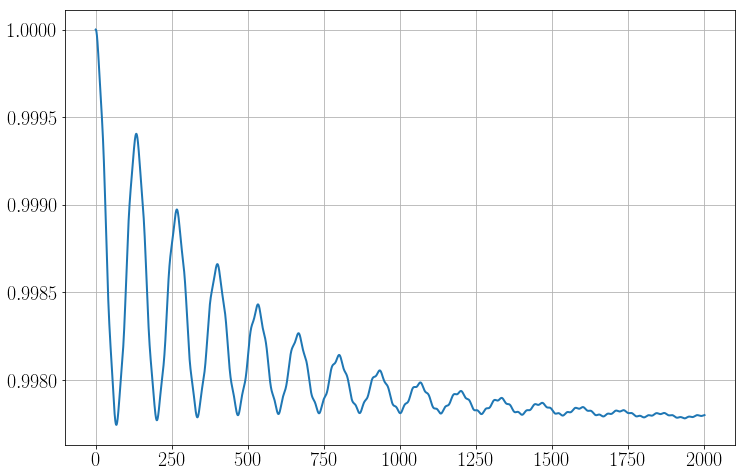

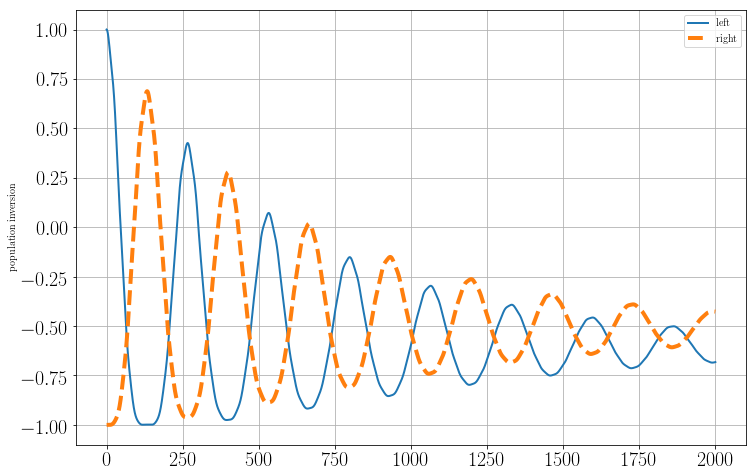

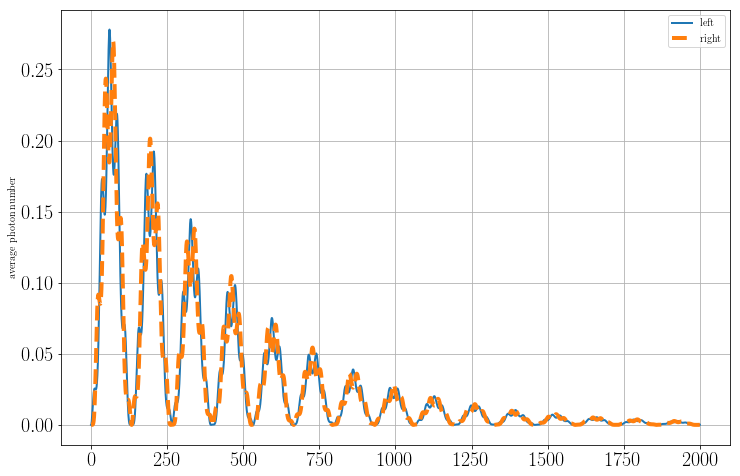

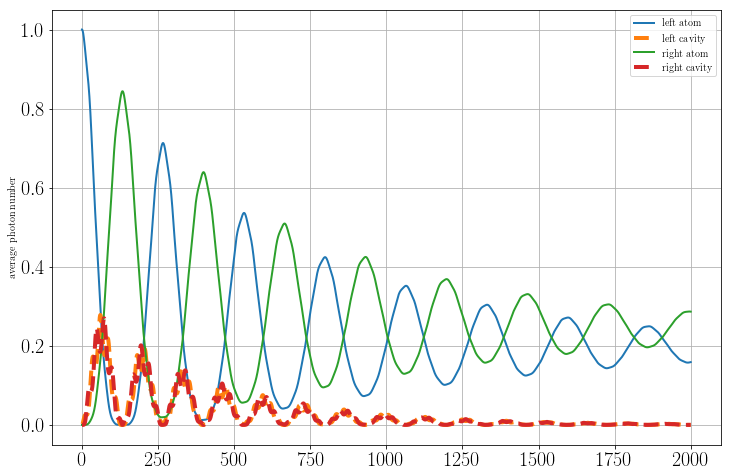

In [170]:
plt.figure(0,figsize=(12,8))
Data = np.zeros((10001,8))
#Data = np.zeros((3932,8))
#Data2 = np.zeros((1501,8))
Data[:,:] = np.genfromtxt(folder+filename)
#Data2[:,:] = np.genfromtxt('./Data/Closed_sys/CCQED+fb_111.txt')
tau = 0.1*5
#tau = 1.
plt.plot(Data[:,0]/tau,Data[:,1],lw=2)
#plt.plot(Data2[:,0]/tau,Data2[:,1],lw=2)
plt.grid(True)
plt.figure(1,figsize=(12,8))
plt.plot(Data[:,0]/tau,Data[:,2],lw=2,label="left")
plt.plot(Data[:,0]/tau,Data[:,3],lw=4,ls="--",label="right")
#plt.xlim(0,10)
plt.ylabel("population inversion")
print(Data[-1,3],Data[-1,2])
plt.legend(loc="best")
plt.grid(True)
plt.figure(2,figsize=(12,8))
plt.plot(Data[:,0]/tau,Data[:,4],lw=2,label="left")
plt.plot(Data[:,0]/tau,Data[:,5],lw=4,ls="--",label="right")
plt.ylabel("average photon number")
plt.legend(loc="best")
plt.grid(True)
#plt.xlim(0,2)
#plt.ylim(0.01,0.02)
plt.figure(3,figsize=(12,8))
plt.plot(Data[:,0]/tau,(Data[:,2]+1)/2.,lw=2,label="left atom")
plt.plot(Data[:,0]/tau,Data[:,4],lw=4,ls="--",label="left cavity")
plt.plot(Data[:,0]/tau,(Data[:,3]+1)/2.,lw=2,label="right atom")
plt.plot(Data[:,0]/tau,Data[:,5],lw=4,ls="--",label="right cavity")
plt.ylabel("average photon number")
plt.legend(loc="best")
#plt.xlim(1,2)
plt.grid(True)
plt.show()

504 100.0 0.001
534 100.0 0.001
564 100.0 0.001
579 100.0 0.001
594 100.0 0.001


<Figure size 864x576 with 0 Axes>

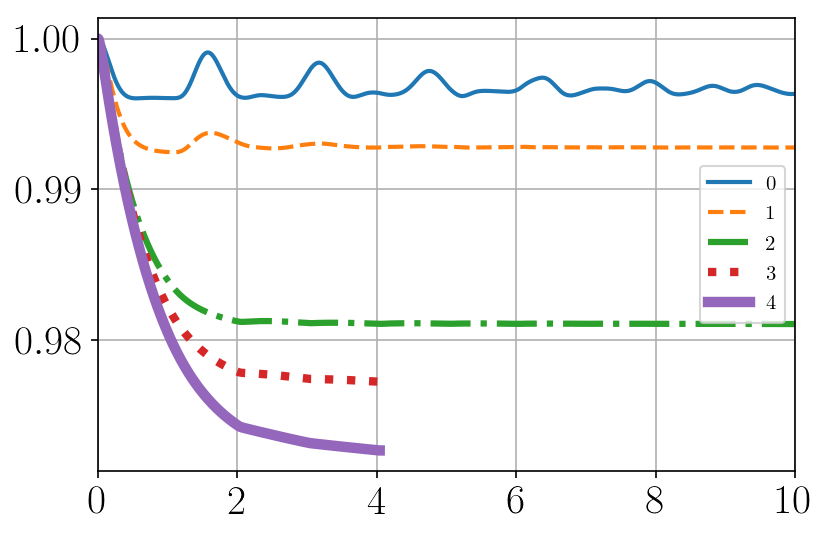

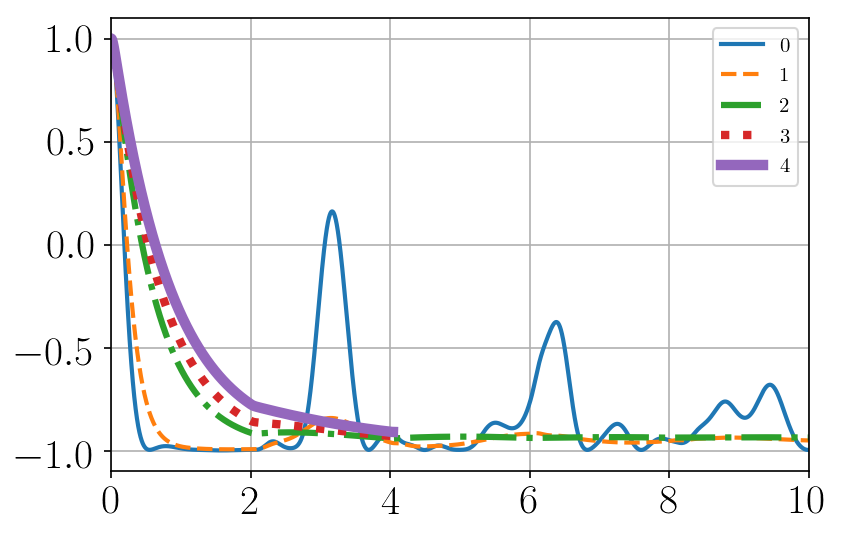

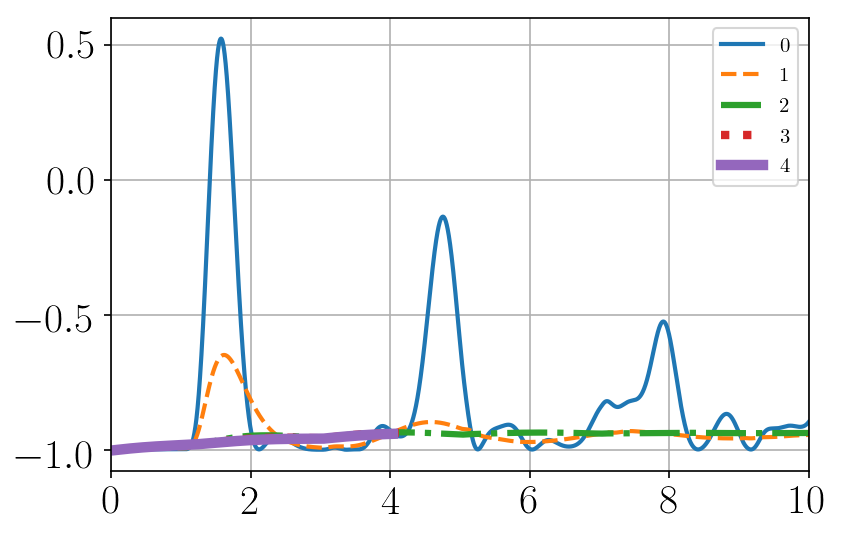

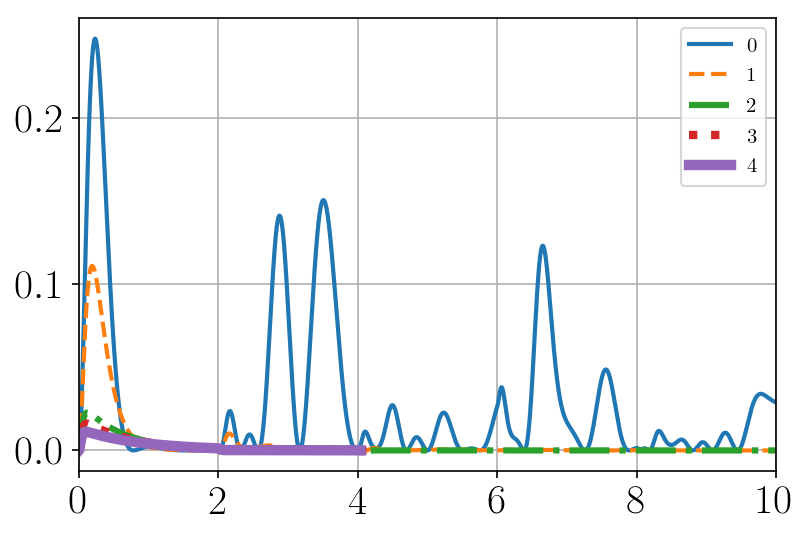

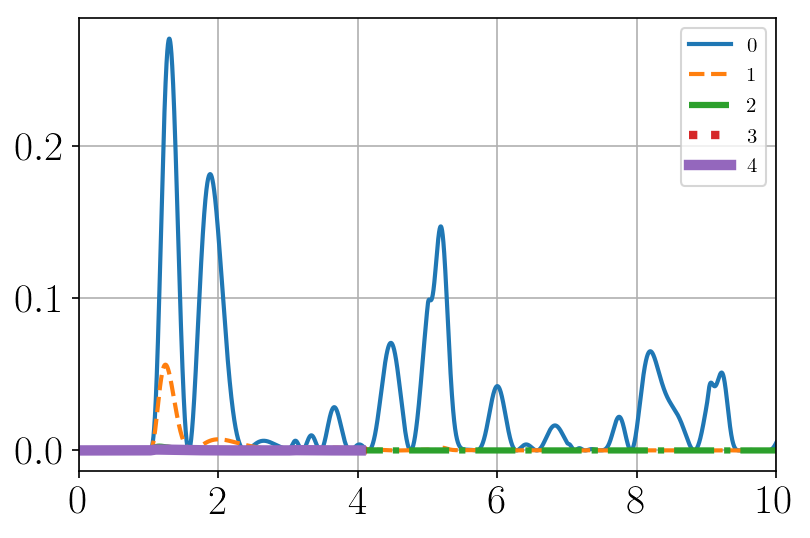

In [111]:
%matplotlib inline
plt.figure(0,figsize=(12,8))

N=np.array([10001,10001,10001,4124,4040])
lsv = ["-","--","-.",":","-"]
lwv = [2,2,3,4,5]
sth = [0,2,4,5,6]
tauv = np.array([5,50,100,500,1000])*0.1
for i in range(0,5):
    N0=4
    Data = np.zeros((5,N[i],8))
    #Data = np.zeros((5,10001,8))
    Ndat = 500+N0+15*sth[i]
    filename = "CCQED+fb_"+str(Ndat)+".txt"
    tau = tauv[N0]#tauv[N0+i]
    Data[i,:,:]=np.genfromtxt(folder+filename)
    print(Ndat,tau,Data[i,1,0]/tau)
    
    plt.figure("0",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,1],lw=lwv[i],ls=lsv[i],label=str(i))

    plt.figure("1a",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,2],lw=lwv[i],ls=lsv[i],label=str(i))
    plt.figure("1b",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,3],lw=lwv[i],ls=lsv[i],label=str(i))
    
    plt.figure("2a",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,4],lw=lwv[i],ls=lsv[i],label=str(i))
    plt.figure("2b",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,5],lw=lwv[i],ls=lsv[i],label=str(i))
    
xmax=1000/tau
plt.figure("0")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("1a")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("1b")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("2a")
plt.xlim(0,xmax)
plt.legend(loc="best")
plt.grid(True)
plt.figure("2b")
plt.xlim(0,xmax)
plt.legend(loc="best")
plt.grid(True)


#tau = 0.02*1000
#plt.show()

### Generating input file

In [179]:
#"0 0. 0. 1. 1. .5 .5 1. -endt 50. -L 5 -tol -3 -dt .02 -Nphot 3 -initind1=1 -initind2=0"


In [98]:
in_f = open("input files/input_open_gimb.dat", 'w+')
g = np.array([.05,0.1,0.2])
kap = np.array([.01,.06,.12,.24,.5,2*np.pi/10.,5*np.pi/20.])
L = np.array([5,100,1000])

Ng = len(g)
NL = len(L)

for ik in range(len(kap)):
    for ig in range(Ng):
        for iL in range(NL):
            N = ik*NL*Ng+ig*NL+iL+605
            line = (str(N) + " " + str(kap[ik])+ " " + str(kap[ik])+" 0.11 0.11 "
                    + str(g[ig]) + " " + str(g[ig]*.9) + " 0. -endt 1000. -L " + str(int(L[iL]))
                    + " -tol -4 -dt .1 -Nphot 3 -initind1=1 -initind2=0\n")
        #print(line)
            in_f.write(line)
in_f.close()

In [96]:
in_f = open("input files/input_open.dat", 'w+')
g = np.array([.05,0.1,0.2])
kap = np.array([.01,.06,.12,.24,.5,2*np.pi/10.,5*np.pi/20.])
L = np.array([5,50,100,500,1000])

Ng = len(g)
NL = len(L)

for ik in range(len(kap)):
    for ig in range(Ng):
        for iL in range(NL):
            N = ik*NL*Ng+ig*NL+iL+500
            line = (str(N) + " " + str(kap[ik])+ " " + str(kap[ik])+" 0.11 0.11 "
                    + str(g[ig]) + " " + str(g[ig]) + " 0. -endt 1000. -L " + str(int(L[iL]))
                    + " -tol -4 -dt .1 -Nphot 3 -initind1=1 -initind2=0\n")
        #print(line)
            in_f.write(line)
in_f.close()

## 2 excitation

In [134]:
folder = './Data/Closed_sys/two_exc/'
num = 354
filename = "CCQED+fb_"+str(num)+".txt"
f = open(folder+"OUT_"+filename, 'r')
file_contents = f.read()
print(file_contents)
f.close()

Data file index: 354

System1 parameters: g1 = 0.020000, Delta_e1 = 0.000000, Delta_c1 = 0.000000, initial index: 1, Omega_e1 = 0.000000, Omega_c1 = 0.000000

System 2 parameters: g2 = 0.020000, Delta_e2 = 0.000000, Delta_c2 = 0.000000, initial index: 1, Omega_e2 = 0.000000, Omega_c2 = 0.000000

Environment parameters: gamma_B1 = 0.000000, gamma_B2 = 0.000000

Connecting fibre parameters: gamma_F1 = 0.110000, gamma_F2 = 0.110000,phi = 0.000000pi, delay_L = 500

Numerical parameters: Nphot_max = 5, tolerance = 1E-04, endt = 1000, dt = 0.100000

Coherent initial state amplitude for cavity1: 0.000000, cavity2: 0.000000, the environment on the left 0.000000, on the right: 0.000000 and in the fibre: 0.000000

thermal photon number: 0.000000

Data file: M*dt,norm,pop1,pop2,nc1_exp,nc2_exp,g2_1_exp,g2_2_exp



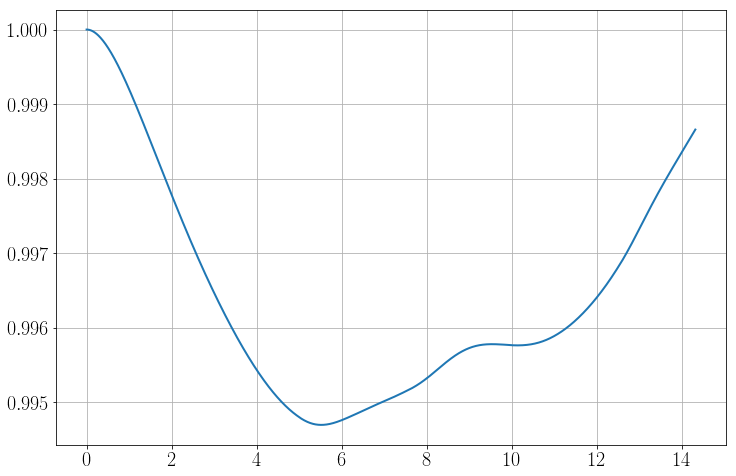

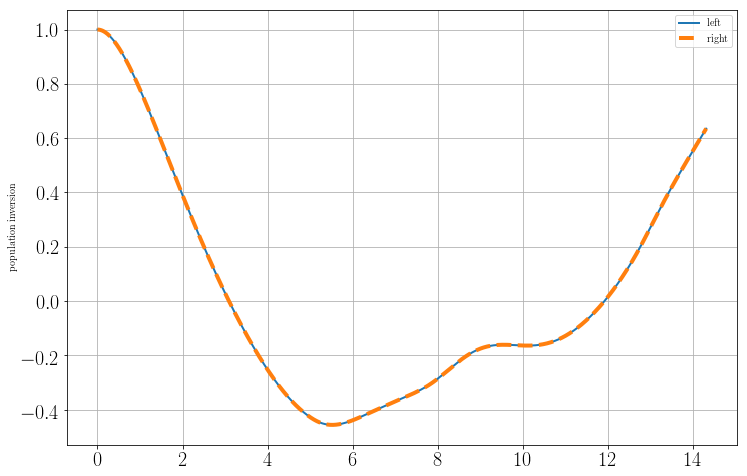

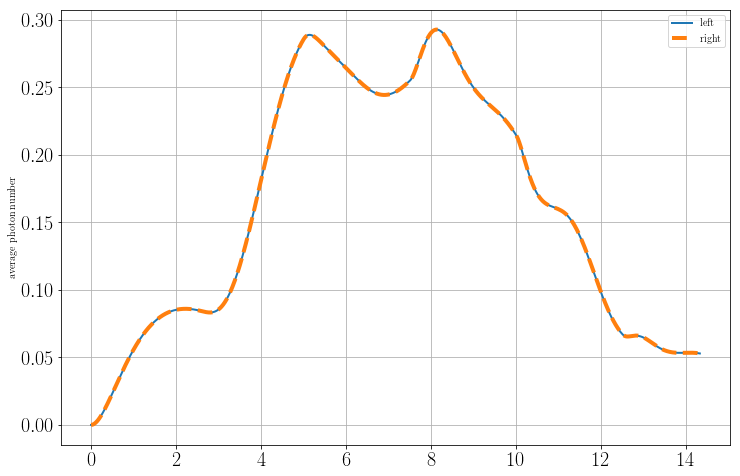

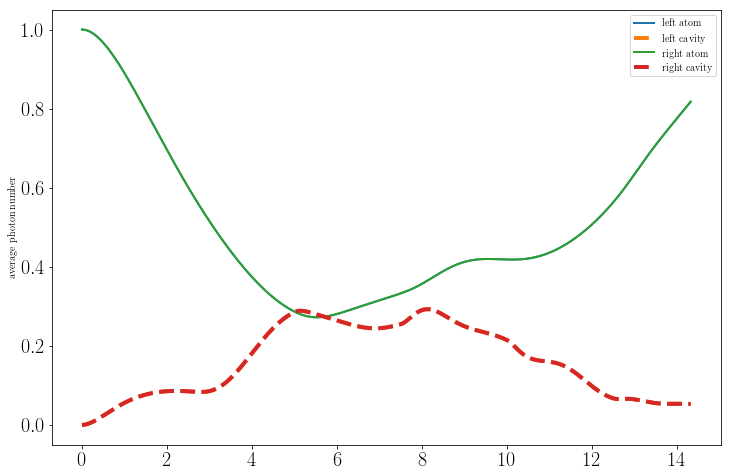

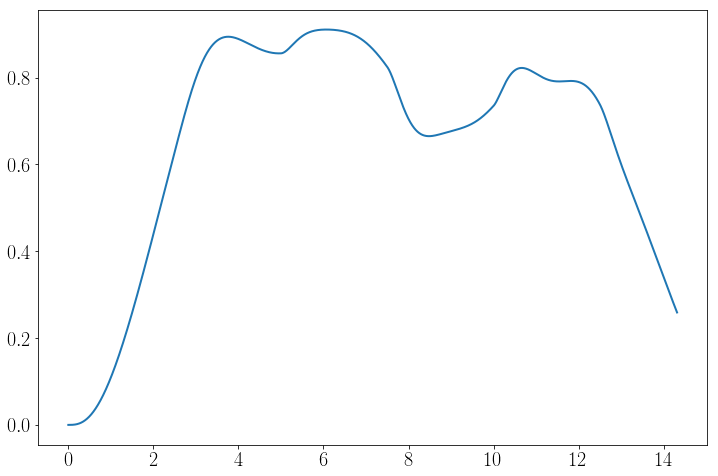

In [136]:
plt.figure(0,figsize=(12,8))
#Data = np.zeros((7501,8))
Data = np.zeros((2864,8))
#Data2 = np.zeros((1662,8))
Data[:,:] = np.genfromtxt(folder+filename)
#Data2[:,:] = np.genfromtxt('./Data/Closed_sys/CCQED+fb_111.txt')
tau = 0.02*1000
#tau = 1.
plt.plot(Data[:,0]/tau,Data[:,1],lw=2)
#plt.plot(Data2[:,0]/tau,Data2[:,1],lw=2)
plt.grid(True)
plt.figure(1,figsize=(12,8))
plt.plot(Data[:,0]/tau,Data[:,2],lw=2,label="left")
plt.plot(Data[:,0]/tau,Data[:,3],lw=4,ls="--",label="right")
#plt.xlim(0,10)
plt.ylabel("population inversion")
plt.legend(loc="best")
plt.grid(True)
plt.figure(2,figsize=(12,8))
plt.plot(Data[:,0]/tau,Data[:,4],lw=2,label="left")
plt.plot(Data[:,0]/tau,Data[:,5],lw=4,ls="--",label="right")
plt.ylabel("average photon number")
plt.legend(loc="best")
plt.grid(True)
plt.figure(3,figsize=(12,8))
plt.plot(Data[:,0]/tau,(Data[:,2]+1)/2.,lw=2,label="left atom")
plt.plot(Data[:,0]/tau,Data[:,4],lw=4,ls="--",label="left cavity")
plt.plot(Data[:,0]/tau,(Data[:,3]+1)/2.,lw=2,label="right atom")
plt.plot(Data[:,0]/tau,Data[:,5],lw=4,ls="--",label="right cavity")
plt.ylabel("average photon number")
plt.legend(loc="best")
plt.figure(4,figsize=(12,8))
plt.plot(Data[:,0]/tau,2-((Data[:,2]+Data[:,3]+2)/2.+Data[:,4]+Data[:,5]),lw=2,label="left atom")

#plt.xlim(0,10)
#plt.ylim(0.01,0.02)
#plt.figure(3,figsize=(12,8))
#plt.plot(Data[:,0]/tau,(Data[:,2]+1)/2.,lw=2,label="left")
#plt.plot(Data[:,0]/tau,Data[:,4],lw=4,ls="--",label="right")
#plt.ylabel("average photon number")
#plt.legend(loc="best")
#plt.xlim(2,4)
#plt.grid(True)
plt.show()

In [75]:
%matplotlib inline
plt.figure(0,figsize=(12,8))

N=np.array([2501,7501,7501])
lsv = ["-","--",":"]
lwv = [2,2,3]
tauv = np.array([5,10,50,100,500,1000])*0.02
for i in range(0,3):
    N0=0
    Data = np.zeros((5,N[i],8))
    filename = "CCQED+fb_"+str(350+N0+30*i)+".txt"
    tau = .1#tauv[N0+i]
    Data[i,:,:]=np.genfromtxt(folder+filename)
    print(350+N0+30*i,tau,Data[i,1,0]/tau)
    
    plt.figure("0",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,1],lw=lwv[i],ls=lsv[i],label=str(i))

    plt.figure("1a",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,2],lw=lwv[i],ls=lsv[i],label=str(i))
    plt.figure("1b",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,3],lw=lwv[i],ls=lsv[i],label=str(i))
    
    plt.figure("2a",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,4],lw=lwv[i],ls=lsv[i],label=str(i))
    plt.figure("2b",dpi=150)
    plt.plot(Data[i,:,0]/tau,Data[i,:,5],lw=lwv[i],ls=lsv[i],label=str(i))
    
xmax=1000.
plt.figure("0")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("1a")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("1b")
plt.legend(loc="best")
plt.xlim(0,xmax)
plt.grid(True)
plt.figure("2a")
plt.xlim(0,xmax)
plt.legend(loc="best")
plt.grid(True)
plt.figure("2b")
plt.xlim(0,xmax)
plt.legend(loc="best")
plt.grid(True)


#tau = 0.02*1000
#plt.show()

ValueError: could not broadcast input array from shape (8159,8) into shape (2501,8)

<Figure size 864x576 with 0 Axes>